<a href="https://colab.research.google.com/github/Ganesh7134/Smart-Predictive-Modeling-for-Rental-Property-Prices/blob/main/Smart_Predictive_Modeling_for_Rental_Property_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/House_rent_data.csv")
df.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [4]:
len(df)

20555

In [5]:
df["amenities"].mode()[0]

'{"LIFT":false,"GYM":false,"INTERNET":true,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}'

In [6]:
df["amenities"] = df["amenities"].fillna(df["amenities"].mode()[0])

In [7]:
internet = []
Ac = []
security = []
for i in df["amenities"]:
  rep = (i.replace("true","1"))
  replace = rep.replace("false","0")
  amenities = eval(replace)
  internet.append(int(amenities["INTERNET"]))
  Ac.append(int(amenities["AC"]))
  security.append(int(amenities["SECURITY"]))

In [8]:
df["internet"] = internet
df["Ac"] = Ac
df["security"] = security

In [9]:
df.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent', 'internet', 'Ac',
       'security'],
      dtype='object')

In [10]:
df["building_type"].value_counts()

IF    9240
AP    8876
IH    2399
GC      17
Name: building_type, dtype: int64

In [11]:
df.isna().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities            0
water_supply        23
building_type       23
balconies           23
rent                23
internet             0
Ac                   0
security             0
dtype: int64

**BHK**: stands for Bedroom, Hall, and Kitchen.
* 2: indicates the number of bedrooms.
* 2: indicates the number of bathrooms.

In [12]:
df["type"].value_counts()

BHK2        11678
BHK3         4388
BHK1         3613
RK1           553
BHK4          233
BHK4PLUS       31
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64

In [13]:
df["type"] = df["type"].fillna(df["type"].mode()[0])

In [14]:
df.isna().sum()

id                   0
type                 0
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities            0
water_supply        23
building_type       23
balconies           23
rent                23
internet             0
Ac                   0
security             0
dtype: int64

In [15]:
df.groupby("locality")["rent"].sum().sort_values(ascending=True)

locality
Malleshpalya New Bus Station, BEML Main Road, LBS Nagar, Kaggadasapura, Bengaluru, Karnataka, India        8000.0
Murgesh Pallya,                                                                                            8000.0
Hosapalaya, Bengaluru, Karnataka, India                                                                    8000.0
Garebhavipalya                                                                                             8000.0
Garden Villas                                                                                              8000.0
                                                                                                          ...    
Marathahalli                                                                                            9044548.0
Banashankari                                                                                            9843850.0
Bellandur                                                                      

In [16]:
df["locality"] = df["locality"].fillna("Malleshpalya New Bus Station, BEML Main Road, LBS Nagar, Kaggadasapura, Bengaluru, Karnataka, India")

In [17]:
df["locality"].value_counts()

Whitefield                                                          903
HSR Layout                                                          682
Banashankari                                                        644
Marathahalli                                                        473
Bellandur                                                           433
                                                                   ... 
vignan nagar                                                          1
Lore Pride, Ferns City, Bengaluru, Karnataka, India                   1
Koralur, Karnataka,Koralur                                            1
Amblipura, 1st Sector                                                 1
Mahadevapura bus stop, Mahadevapura, Bengaluru, Karnataka, India      1
Name: locality, Length: 1917, dtype: int64

In [18]:
df.isna().sum()

id                  0
type                0
locality            0
activation_date    23
latitude           23
longitude          23
lease_type         23
gym                 0
lift                0
swimming_pool       0
negotiable          0
furnishing          0
parking             0
property_size       0
property_age       23
bathroom           23
facing             23
cup_board          23
floor              23
total_floor        23
amenities           0
water_supply       23
building_type      23
balconies          23
rent               23
internet            0
Ac                  0
security            0
dtype: int64

In [19]:
df["activation_date"].value_counts()

4/11/2017 18:11     4
8/7/2018 22:31      3
7/4/2018 18:04      3
27-01-2018 12:06    3
11/7/2018 18:20     3
                   ..
2/8/2017 15:44      1
19-06-2018 14:15    1
4/8/2017 21:13      1
29-01-2018 17:41    1
14-06-2018 11:50    1
Name: activation_date, Length: 19566, dtype: int64

In [20]:
df["lease_type"].value_counts()

FAMILY      10190
ANYONE       9697
BACHELOR      587
COMPANY        58
Name: lease_type, dtype: int64

In [21]:
df["lease_type"] = df["lease_type"].fillna(df["lease_type"].mode()[0])

In [22]:
df.dropna(subset=["latitude","longitude","activation_date"],inplace=True)

In [23]:
df.isna().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
internet           0
Ac                 0
security           0
dtype: int64

In [24]:
len(df)

20532

In [25]:
import numpy as np

# Calculate IQR for numerical columns and store them in a dictionary
iqr_values = {}
num_data = df.select_dtypes(np.number)
for i in num_data.columns:
  q1 = num_data[i].quantile(0.25)
  q3 = num_data[i].quantile(0.75)
  iqr_values[i] = q3 - q1

def treat_outliers_IQR(df):
  num = df.select_dtypes(np.number)
  for i in num.columns:
    lower = q1 - 1.5 * iqr_values[i]
    upper = q3 + 1.5 * iqr_values[i]
    outliers = df[(df[i] < lower)|(df[i] > upper)]
  return outliers

In [26]:
treat_outliers_IQR(df)

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,floor,total_floor,amenities,water_supply,building_type,balconies,rent,internet,Ac,security


In [27]:
import numpy as np
num = df.select_dtypes(np.number)

In [28]:
num

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent,internet,Ac,security
0,12.934471,77.634471,1,1,1,0,1250,25.0,2.0,2.0,6.0,12.0,2.0,40000.0,1,0,1
1,12.929557,77.672280,0,1,0,1,1400,4.0,2.0,2.0,3.0,4.0,2.0,22000.0,0,0,1
2,12.982870,80.262012,0,1,0,0,1350,6.0,3.0,3.0,1.0,5.0,3.0,28000.0,0,0,0
3,12.955991,77.531634,0,0,0,1,600,3.0,1.0,1.0,1.0,2.0,0.0,8000.0,0,0,0
4,12.963903,77.649446,0,0,0,1,1500,15.0,3.0,4.0,0.0,0.0,1.0,45000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,12.925380,77.524397,1,1,1,1,1650,1.0,3.0,3.0,4.0,4.0,2.0,25000.0,1,0,1
20528,12.931072,77.632361,0,0,0,1,1000,10.0,2.0,2.0,1.0,2.0,2.0,30000.0,1,0,0
20529,12.901800,77.566597,1,1,0,1,1000,0.0,2.0,2.0,5.0,5.0,2.0,16000.0,1,0,1
20530,12.965502,77.647694,0,1,0,0,1000,5.0,2.0,2.0,2.0,4.0,3.0,30000.0,1,0,1


In [29]:
import warnings
warnings.filterwarnings("ignore")

latitude
0.13151129838139883


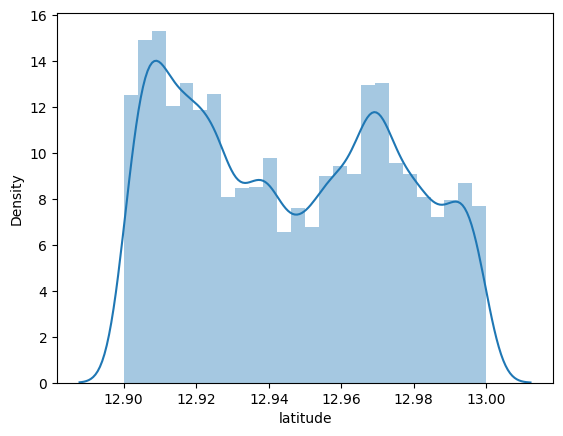

longitude
13.515882854393254


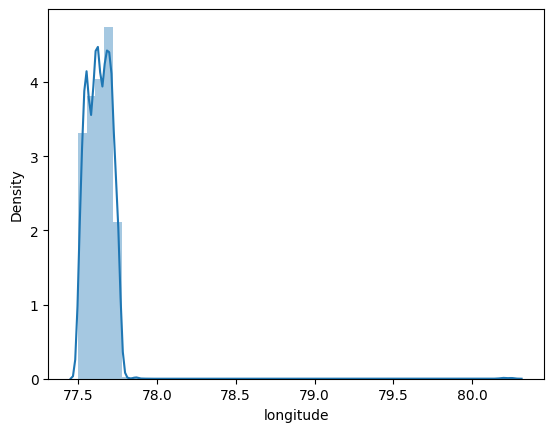

gym
1.304352787175277


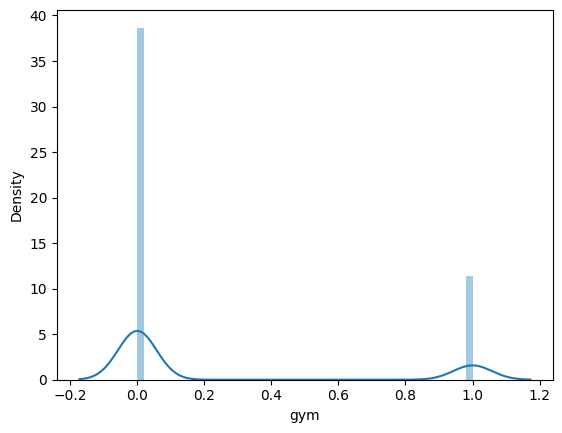

lift
0.5753134098873259


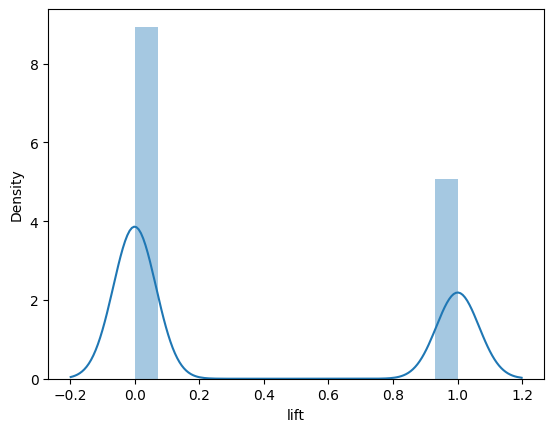

swimming_pool
1.7120512484345214


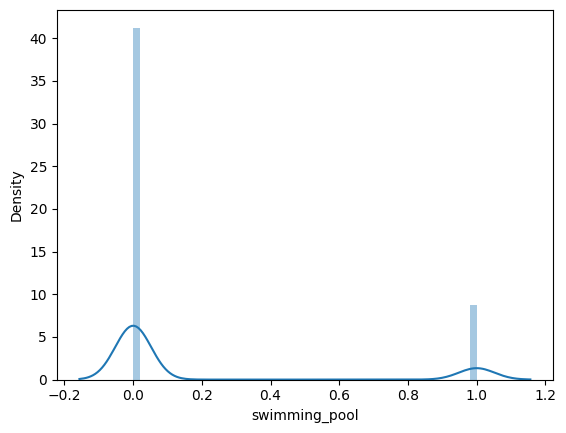

negotiable
-0.9340293058528458


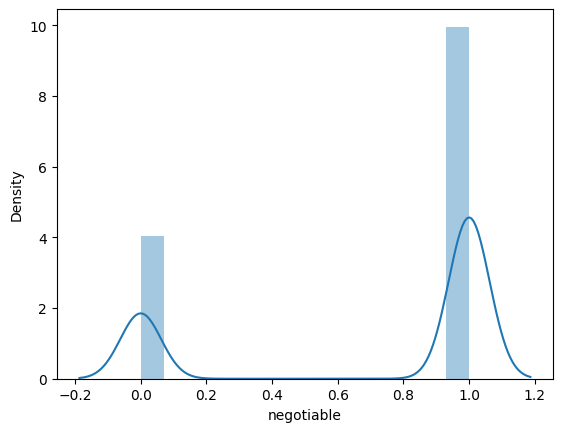

property_size
29.046675436770393


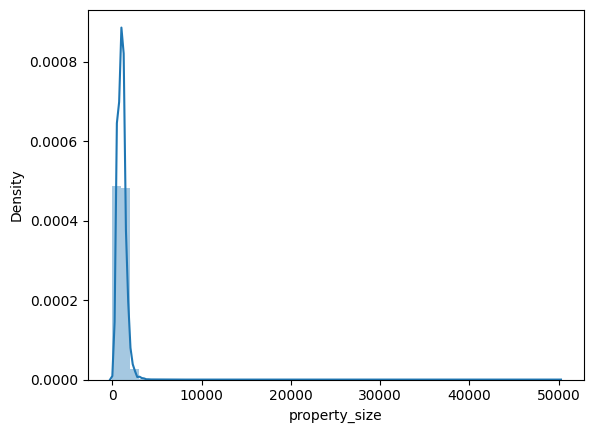

property_age
13.330648152266171


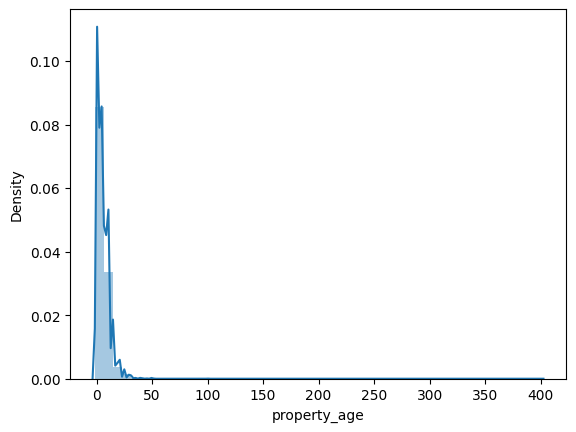

bathroom
1.5199115021093628


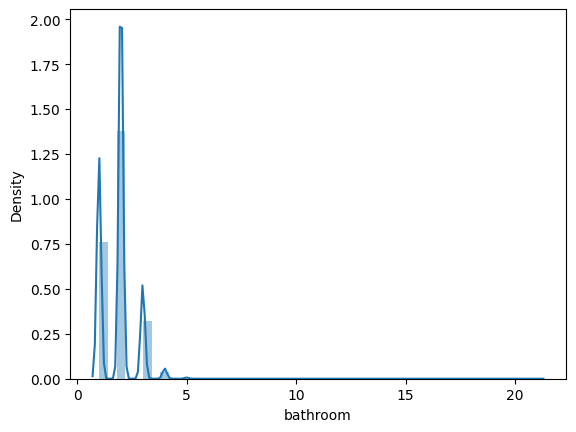

cup_board
143.27486342791147


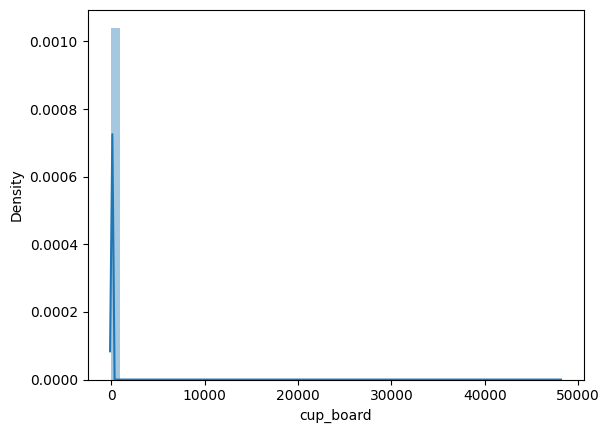

floor
2.9234010309457648


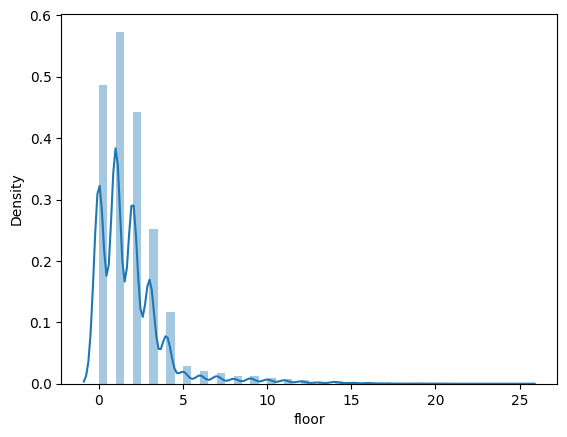

total_floor
2.703063671421437


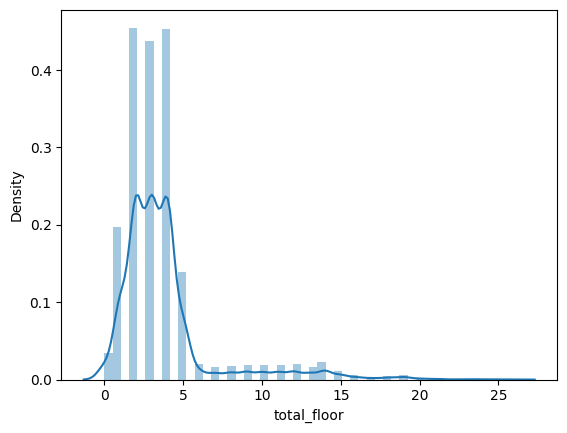

balconies
0.8578902690241071


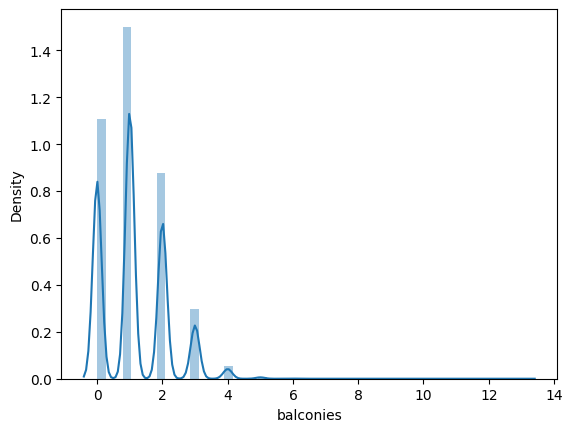

rent
1.0637324719694126


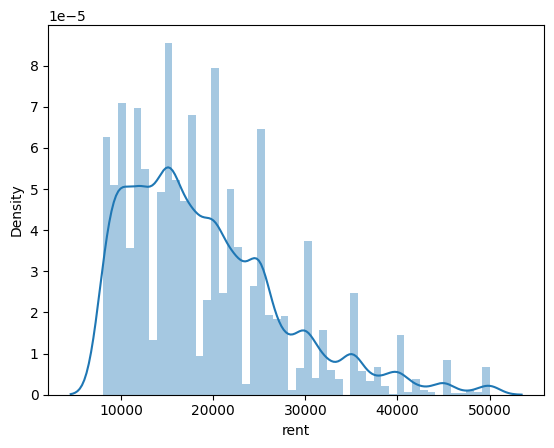

internet
-0.6832958409013015


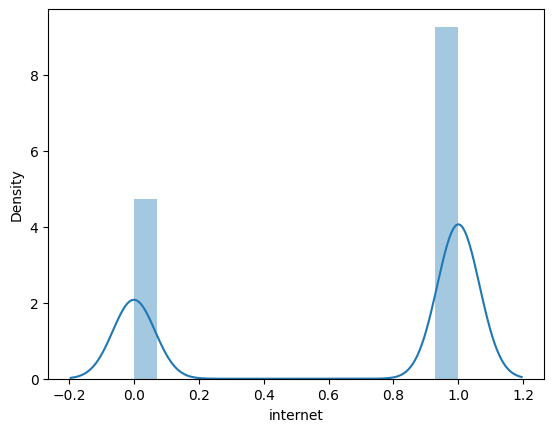

Ac
4.519915781468654


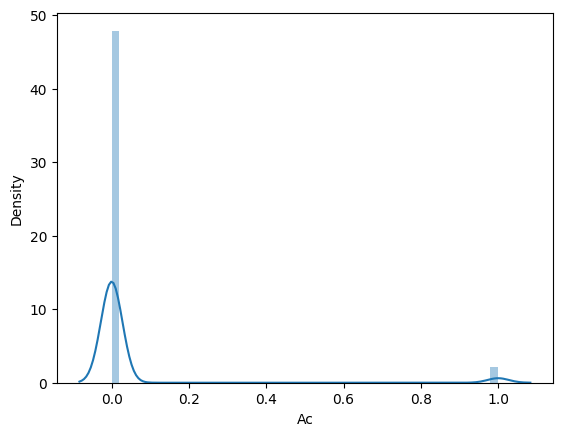

security
0.10534747754732211


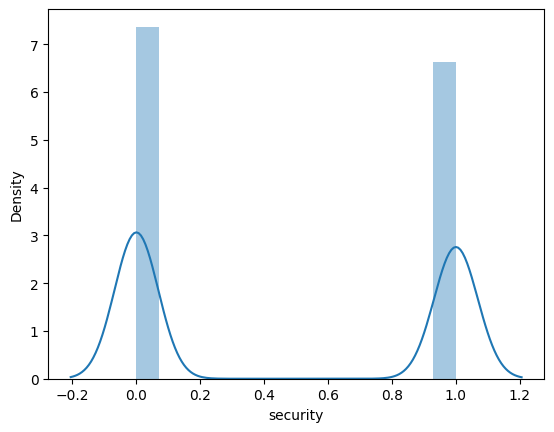

In [30]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt

for i in num.columns:
  print(i)
  print(skew(num[i]))
  plt.figure()
  sns.distplot(num[i])
  plt.show()

In [31]:
 #excet security and latitude we need to apply all columns transformations

mask1 = df["property_size"] <= 0
print(mask1.sum())

mask2 = df["property_age"] <= 0
print(mask2.sum())
df.loc[mask2,"property_age"] = np.nan

mask3 = df["bathroom"] <= 0
print(mask3.sum())
df.loc[mask3,"bathroom"] = np.nan

mask4 = df["cup_board"] <= 0
print(mask4.sum())
df.loc[mask4,"cup_board"] = np.nan

mask5 = df["floor"] <= 0
print(mask5.sum())
df.loc[mask5,"floor"] = np.nan

mask6 = df["total_floor"] <= 0
print(mask6.sum())
df.loc[mask6,"total_floor"] = np.nan

mask7 = df["balconies"] <= 0
print(mask7.sum())
df.loc[mask7,"balconies"] = np.nan

mask8 = df["rent"] <= 0
print(mask8.sum())
df.loc[mask8,"rent"] = np.nan

0
3373
0
1875
4987
363
5901
0


In [32]:
df.isna().sum()

id                    0
type                  0
locality              0
activation_date       0
latitude              0
longitude             0
lease_type            0
gym                   0
lift                  0
swimming_pool         0
negotiable            0
furnishing            0
parking               0
property_size         0
property_age       3373
bathroom              0
facing                0
cup_board          1875
floor              4987
total_floor         363
amenities             0
water_supply          0
building_type         0
balconies          5901
rent                  0
internet              0
Ac                    0
security              0
dtype: int64

In [33]:
df["property_age"].mean()

6.906055131417915

In [34]:
df["property_age"] = df["property_age"].fillna(df["property_age"].mean())

In [35]:
int(df["cup_board"].mean())

5

In [36]:
df["cup_board"] = df["cup_board"].fillna(int(df["cup_board"].mean()))

In [37]:
int(df["floor"].mean())

2

In [38]:
df["floor"] = df["floor"].fillna(int(df["floor"].mean()))

In [39]:
int(df["total_floor"].mean())

3

In [40]:
df["total_floor"] = df["total_floor"].fillna(int(df["total_floor"].mean()))

In [41]:
int(df["balconies"].mean())

1

In [42]:
df["balconies"] = df["balconies"].fillna(int(df["balconies"].mean()))

In [43]:
df.isna().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
internet           0
Ac                 0
security           0
dtype: int64

previous_skewness:  29.046675436770393
-1.1231957841782536


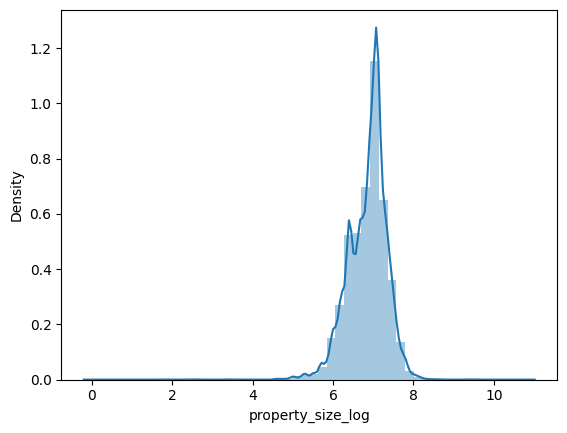

previous_skewness:  16.972784885298733
-0.5983217901625355


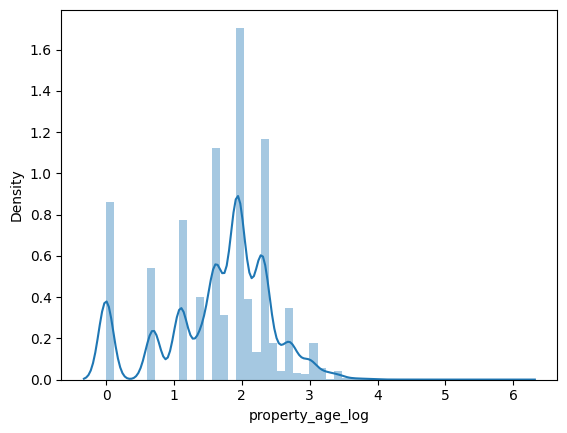

previous_skewness:  1.5199115021093628
-0.2388432052620402


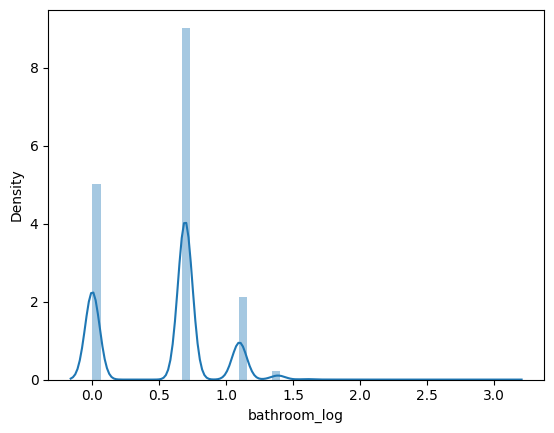

previous_skewness:  143.27475719052012
0.422588962254761


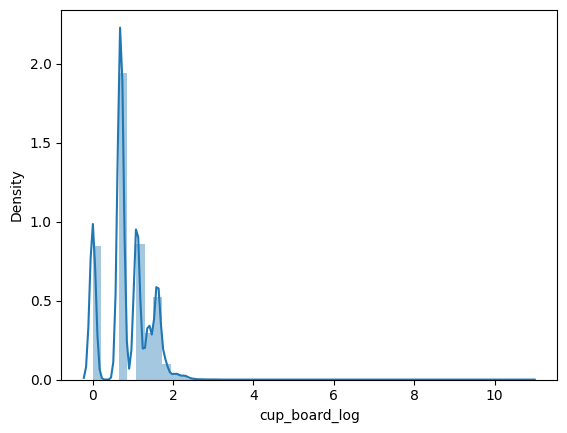

previous_skewness:  3.7565145604757935
0.8276612857334822


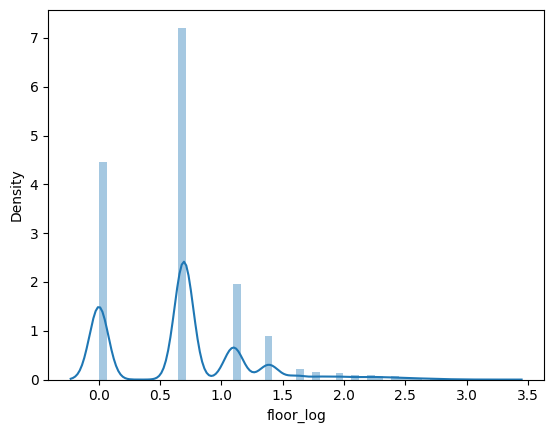

previous_skewness:  2.7852778149733695
0.4106172662697741


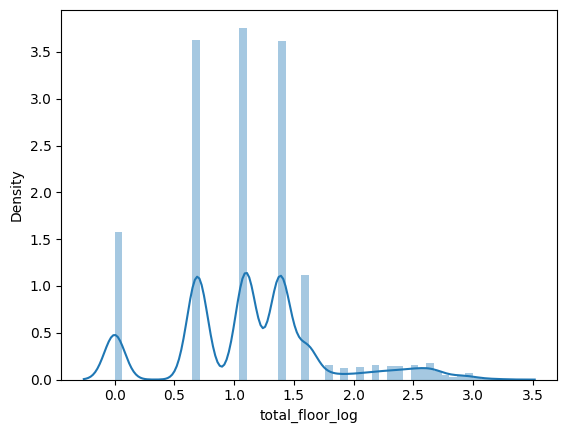

previous_skewness:  2.0544118489330985
1.130537833332059


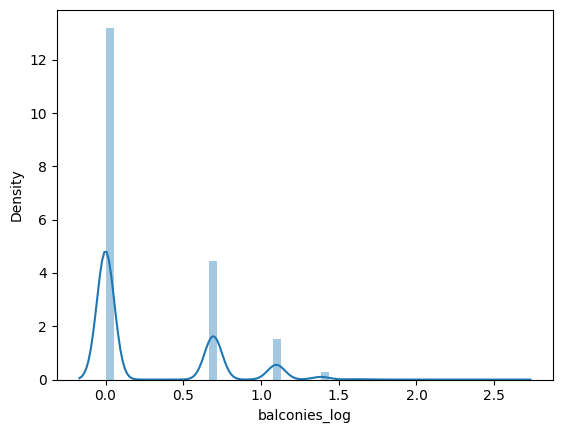

previous_skewness:  1.0637324719694126
0.11835013683635287


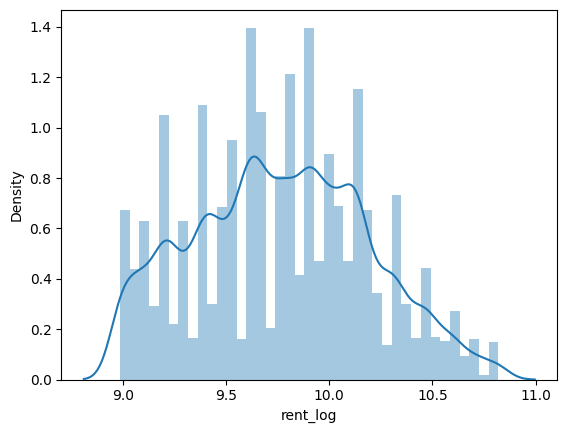

In [44]:
import matplotlib.pyplot as plt

df["property_size_log"] = np.log(df["property_size"])
print("previous_skewness: ",skew(df["property_size"]))
print(skew(df["property_size_log"]))
sns.distplot(df["property_size_log"])
plt.show()


df["property_age_log"] = np.log(df["property_age"])
print("previous_skewness: ",skew(df["property_age"]))
print(skew(df["property_age_log"]))
sns.distplot(df["property_age_log"])
plt.show()

df["bathroom_log"] = np.log(df["bathroom"])
print("previous_skewness: ",skew(df["bathroom"]))
print(skew(df["bathroom_log"]))
sns.distplot(df["bathroom_log"])
plt.show()

df["cup_board_log"] = np.log(df["cup_board"])
print("previous_skewness: ",skew(df["cup_board"]))
print(skew(df["cup_board_log"]))
sns.distplot(df["cup_board_log"])
plt.show()

df["floor_log"] = np.log(df["floor"])
print("previous_skewness: ",skew(df["floor"]))
print(skew(df["floor_log"]))
sns.distplot(df["floor_log"])
plt.show()

df["total_floor_log"] = np.log(df["total_floor"])
print("previous_skewness: ",skew(df["total_floor"]))
print(skew(df["total_floor_log"]))
sns.distplot(df["total_floor_log"])
plt.show()

df["balconies_log"] = np.log(df["balconies"])
print("previous_skewness: ",skew(df["balconies"]))
print(skew(df["balconies_log"]))
sns.distplot(df["balconies_log"])
plt.show()

df["rent_log"] = np.log(df["rent"])
print("previous_skewness: ",skew(df["rent"]))
print(skew(df["rent_log"]))
sns.distplot(df["rent_log"])
plt.show()

#**EDA**

In [45]:
df["security"] = df["security"].astype("object")
df["Ac"] = df["Ac"].astype("object")
df["internet"] = df["internet"].astype("object")
df["swimming_pool"] = df["swimming_pool"].astype("object")
df["lift"] = df["lift"].astype("object")
df["lift"].value_counts()

0    13104
1     7428
Name: lift, dtype: int64

In [46]:
df.select_dtypes("object").columns

Index(['id', 'type', 'locality', 'activation_date', 'lease_type', 'lift',
       'swimming_pool', 'furnishing', 'parking', 'facing', 'amenities',
       'water_supply', 'building_type', 'internet', 'Ac', 'security'],
      dtype='object')

<Axes: xlabel='type'>

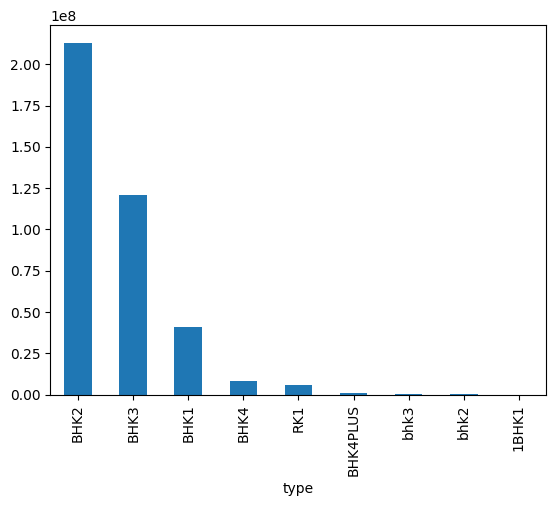

In [47]:
df.groupby("type")["rent"].sum().sort_values(ascending=False).plot(kind="bar")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Whitefield'),
  Text(1, 0, 'HSR Layout'),
  Text(2, 0, 'Bellandur'),
  Text(3, 0, 'Banashankari'),
  Text(4, 0, 'Marathahalli'),
  Text(5, 0, 'Mahadevapura'),
  Text(6, 0, 'Koramangala'),
  Text(7, 0, 'JP Nagar'),
  Text(8, 0, 'BTM Layout'),
  Text(9, 0, 'Jayanagar')])

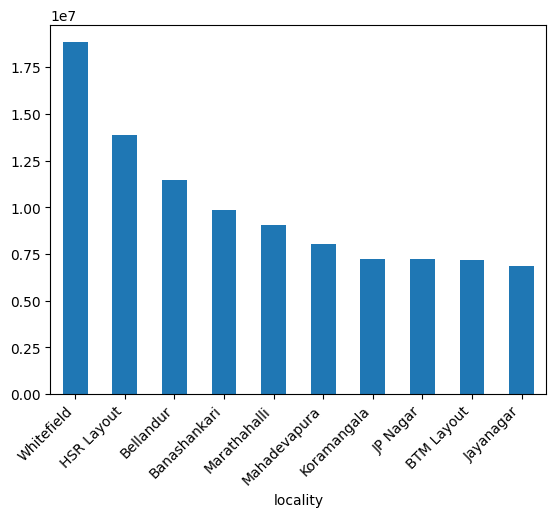

In [48]:
df.groupby("locality")["rent"].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.xticks(rotation=45,ha="right")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1/1/2018 12:26'),
  Text(1, 0, '1/1/2018 11:23'),
  Text(2, 0, '1/1/2018 11:03'),
  Text(3, 0, '1/1/2018 13:50'),
  Text(4, 0, '1/1/2018 11:43'),
  Text(5, 0, '1/1/2018 14:08'),
  Text(6, 0, '1/1/2018 10:43'),
  Text(7, 0, '1/1/2018 12:13'),
  Text(8, 0, '1/1/2018 14:02'),
  Text(9, 0, '1/1/2018 12:58')])

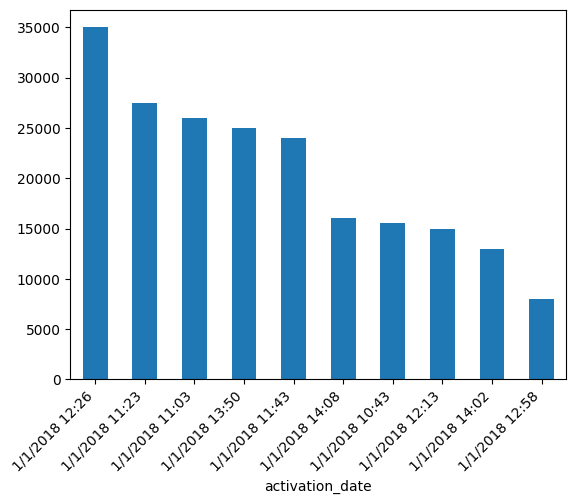

In [49]:
df.groupby("activation_date")["rent"].sum()[:10].sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=45,ha="right")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'ANYONE'),
  Text(2, 0, 'BACHELOR'),
  Text(3, 0, 'COMPANY')])

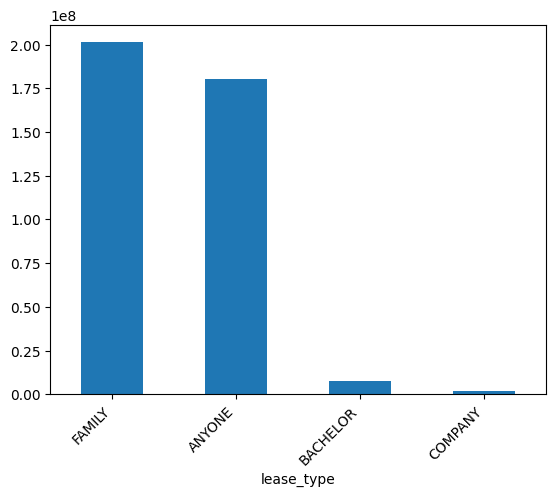

In [50]:
df.groupby("lease_type")["rent"].sum().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=45,ha="right")

(array([0, 1, 2]),
 [Text(0, 0, 'SEMI_FURNISHED'),
  Text(1, 0, 'FULLY_FURNISHED'),
  Text(2, 0, 'NOT_FURNISHED')])

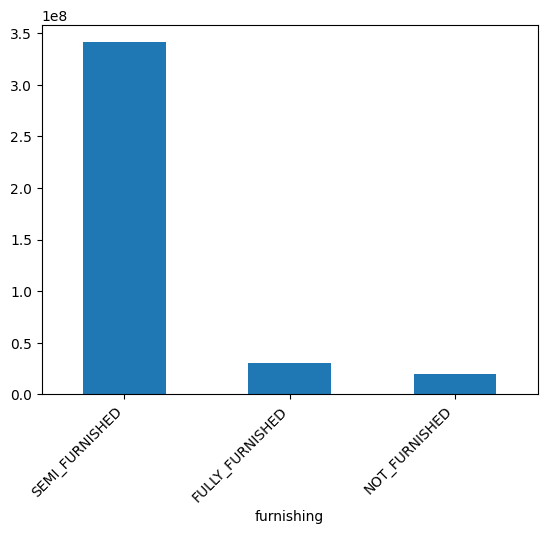

In [51]:
df.groupby("furnishing")["rent"].sum().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=45,ha="right")

<Axes: ylabel='rent'>

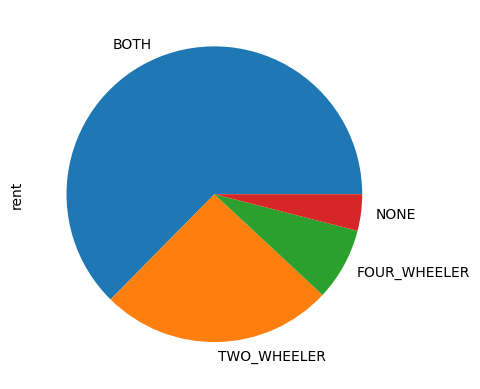

In [52]:
df.groupby("parking")["rent"].sum().sort_values(ascending=False).plot(kind="pie")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'E'),
  Text(1, 0, 'N'),
  Text(2, 0, 'W'),
  Text(3, 0, 'S'),
  Text(4, 0, 'NE'),
  Text(5, 0, 'SE'),
  Text(6, 0, 'NW'),
  Text(7, 0, 'SW')])

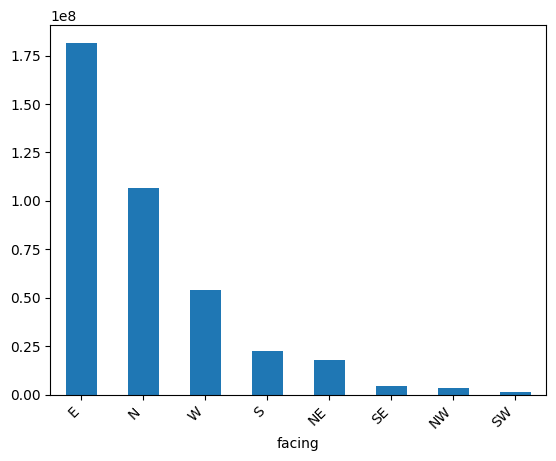

In [53]:
df.groupby("facing")["rent"].sum().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=45,ha="right")

(array([0, 1, 2]),
 [Text(0, 0, 'CORP_BORE'), Text(1, 0, 'CORPORATION'), Text(2, 0, 'BOREWELL')])

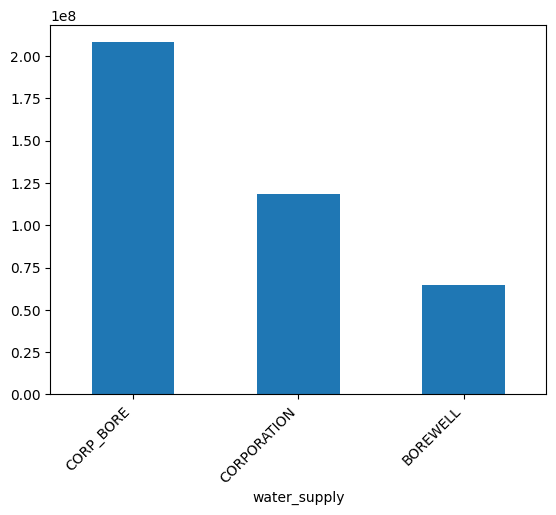

In [54]:
df.groupby("water_supply")["rent"].sum().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=45,ha="right")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'AP'), Text(1, 0, 'IF'), Text(2, 0, 'IH'), Text(3, 0, 'GC')])

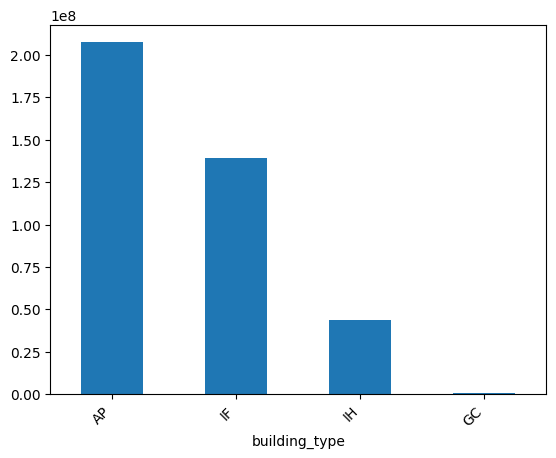

In [55]:
df.groupby("building_type")["rent"].sum().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=45,ha="right")

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

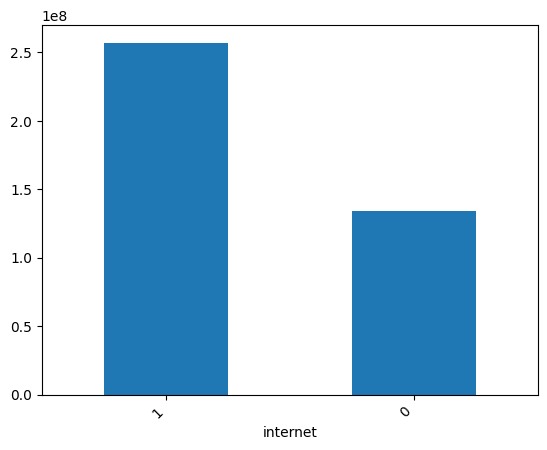

In [56]:
df.groupby("internet")["rent"].sum().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=45,ha="right")

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

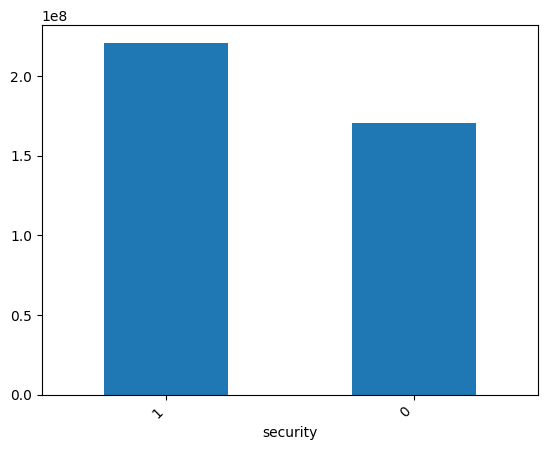

In [57]:
df.groupby("security")["rent"].sum().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=45,ha="right")

##**Finding correlation between categorical variables to the target rent**

In [58]:
df.select_dtypes("object").columns

Index(['id', 'type', 'locality', 'activation_date', 'lease_type', 'lift',
       'swimming_pool', 'furnishing', 'parking', 'facing', 'amenities',
       'water_supply', 'building_type', 'internet', 'Ac', 'security'],
      dtype='object')

In [59]:
from scipy.stats import spearmanr
print(spearmanr(df["type"],df["rent"])) # good positive correlation

SignificanceResult(statistic=0.5523223281515955, pvalue=0.0)


In [60]:
print(spearmanr(df["locality"],df["rent"])) # very less positive but null hypothesis not rejected

SignificanceResult(statistic=0.0065244188085934185, pvalue=0.34987259010740834)


In [61]:
print(spearmanr(df["activation_date"],df["rent"])) # not that much

SignificanceResult(statistic=0.0018116400258946666, pvalue=0.7951922740331098)


In [62]:
print(spearmanr(df["lease_type"],df["rent"]))

SignificanceResult(statistic=0.09689622457325002, pvalue=5.053273992780291e-44)


In [63]:
print(spearmanr(df["lift"],df["rent"])) # having good positive correlation

SignificanceResult(statistic=0.5114261847356162, pvalue=0.0)


In [64]:
print(spearmanr(df["swimming_pool"],df["rent"])) # good positive

SignificanceResult(statistic=0.4295183531245045, pvalue=0.0)


In [65]:
print(spearmanr(df["furnishing"],df["rent"])) # not that much

SignificanceResult(statistic=0.012406757755943838, pvalue=0.07544928553511272)


In [66]:
print(spearmanr(df["parking"],df["rent"])) # negative correlation

SignificanceResult(statistic=-0.5405339200337582, pvalue=0.0)


In [67]:
print(spearmanr(df["facing"],df["rent"]))

SignificanceResult(statistic=0.03829623490351991, pvalue=4.0388704739971765e-08)


In [68]:
print(spearmanr(df["water_supply"],df["rent"]))

SignificanceResult(statistic=-0.0028874040502381844, pvalue=0.6790853624896469)


In [69]:
print(spearmanr(df["building_type"],df["rent"])) #negative correlation

SignificanceResult(statistic=-0.4374256439128353, pvalue=0.0)


In [70]:
print(spearmanr(df["internet"],df["rent"]))

SignificanceResult(statistic=-0.03407427368167426, pvalue=1.0415540736359924e-06)


In [71]:
print(spearmanr(df["security"],df["rent"])) # positive

SignificanceResult(statistic=0.4533606177488937, pvalue=0.0)


previous_skewness:  29.046675436770393
-1.1231957841782536


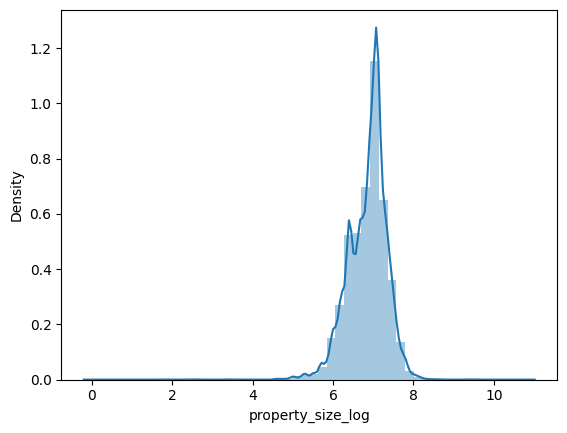

previous_skewness:  16.972784885298733
-0.5983217901625355


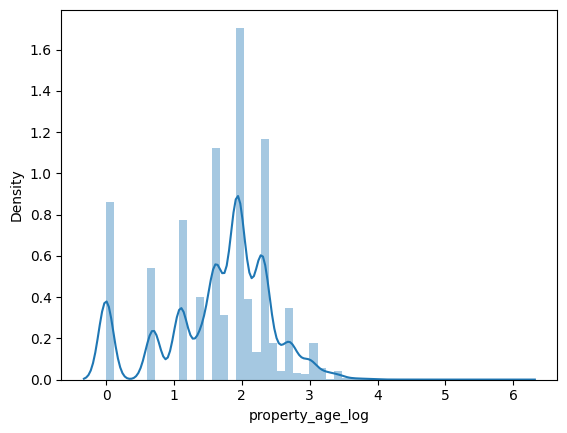

previous_skewness:  1.5199115021093628
-0.2388432052620402


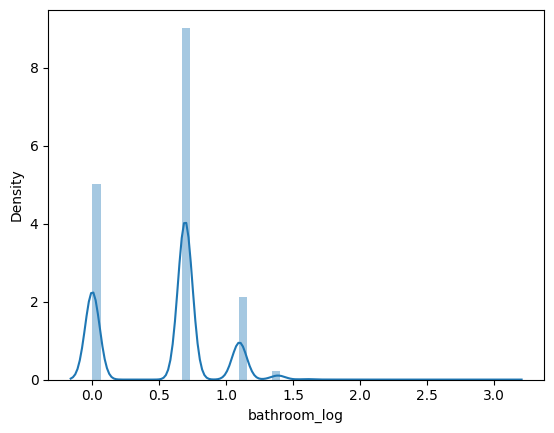

previous_skewness:  143.27475719052012
0.422588962254761


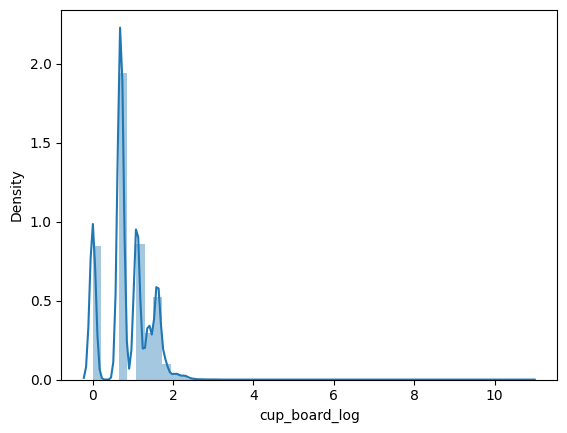

previous_skewness:  3.7565145604757935
0.8276612857334822


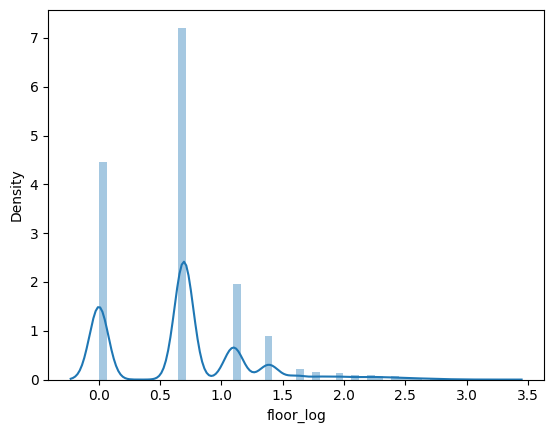

previous_skewness:  2.7852778149733695
0.4106172662697741


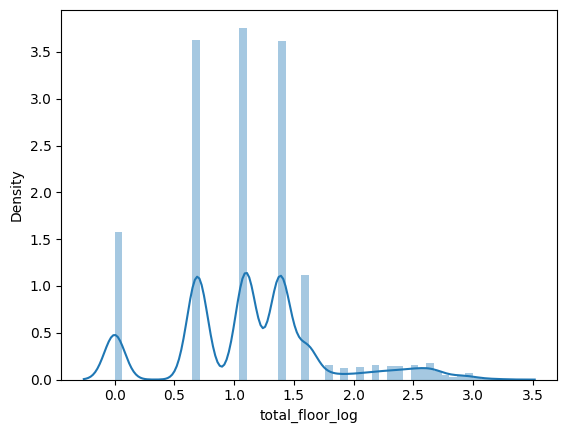

previous_skewness:  2.0544118489330985
1.130537833332059


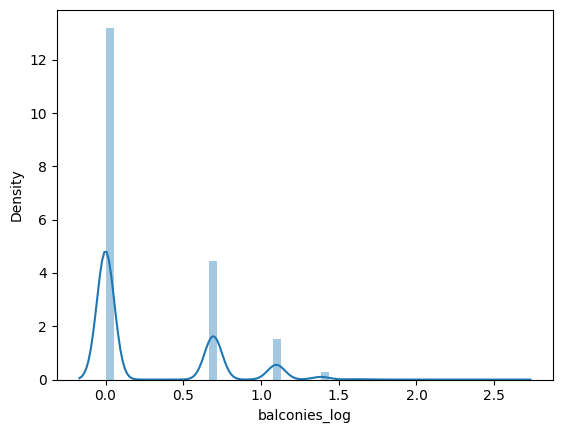

previous_skewness:  1.0637324719694126
0.11835013683635287


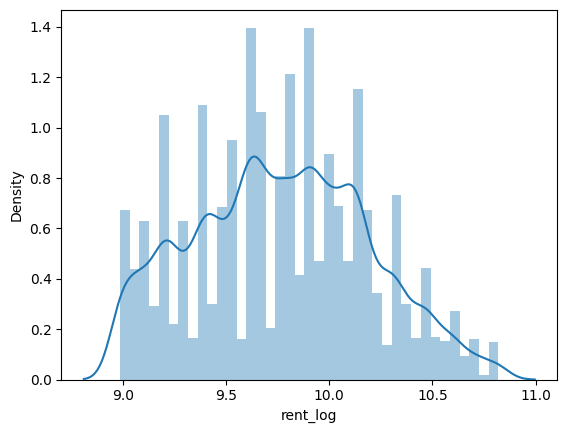

In [72]:
import matplotlib.pyplot as plt

df["property_size_log"] = np.log(df["property_size"])
print("previous_skewness: ",skew(df["property_size"]))
print(skew(df["property_size_log"]))
sns.distplot(df["property_size_log"])
plt.show()


df["property_age_log"] = np.log(df["property_age"])
print("previous_skewness: ",skew(df["property_age"]))
print(skew(df["property_age_log"]))
sns.distplot(df["property_age_log"])
plt.show()

df["bathroom_log"] = np.log(df["bathroom"])
print("previous_skewness: ",skew(df["bathroom"]))
print(skew(df["bathroom_log"]))
sns.distplot(df["bathroom_log"])
plt.show()

df["cup_board_log"] = np.log(df["cup_board"])
print("previous_skewness: ",skew(df["cup_board"]))
print(skew(df["cup_board_log"]))
sns.distplot(df["cup_board_log"])
plt.show()

df["floor_log"] = np.log(df["floor"])
print("previous_skewness: ",skew(df["floor"]))
print(skew(df["floor_log"]))
sns.distplot(df["floor_log"])
plt.show()

df["total_floor_log"] = np.log(df["total_floor"])
print("previous_skewness: ",skew(df["total_floor"]))
print(skew(df["total_floor_log"]))
sns.distplot(df["total_floor_log"])
plt.show()

df["balconies_log"] = np.log(df["balconies"])
print("previous_skewness: ",skew(df["balconies"]))
print(skew(df["balconies_log"]))
sns.distplot(df["balconies_log"])
plt.show()

df["rent_log"] = np.log(df["rent"])
print("previous_skewness: ",skew(df["rent"]))
print(skew(df["rent_log"]))
sns.distplot(df["rent_log"])
plt.show()

In [73]:
x = df[["property_size_log","property_age_log","bathroom_log","cup_board_log","floor_log","total_floor_log","balconies_log","rent_log"]].corr()

<Axes: >

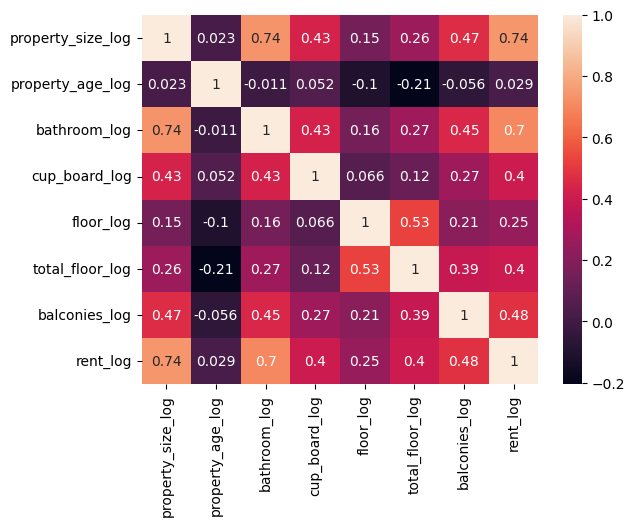

In [74]:
import seaborn as sns
sns.heatmap(x,annot=True)

In [75]:
X = df.loc[:,["property_size_log","property_age_log","bathroom_log","cup_board_log","total_floor_log","balconies_log","type","lift","swimming_pool","parking","building_type","security"]]
Y = df.loc[:,"rent_log"]

In [76]:
X.select_dtypes("object").columns

Index(['type', 'lift', 'swimming_pool', 'parking', 'building_type',
       'security'],
      dtype='object')

In [77]:
df.isna().sum()

id                   0
type                 0
locality             0
activation_date      0
latitude             0
longitude            0
lease_type           0
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age         0
bathroom             0
facing               0
cup_board            0
floor                0
total_floor          0
amenities            0
water_supply         0
building_type        0
balconies            0
rent                 0
internet             0
Ac                   0
security             0
property_size_log    0
property_age_log     0
bathroom_log         0
cup_board_log        0
floor_log            0
total_floor_log      0
balconies_log        0
rent_log             0
dtype: int64

In [78]:
df["negotiable"] = df["negotiable"].astype("object")

##**Applying Machine learning Model**

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb


X = df.loc[:,["property_size_log","property_age_log","bathroom_log","cup_board_log","total_floor_log","balconies_log","latitude","longitude","type","lift","swimming_pool","parking","building_type","security","lease_type","locality","furnishing","water_supply","facing","negotiable"]]
Y = df.loc[:,"rent_log"]

Ohe1 = OneHotEncoder(handle_unknown="ignore")
type_ohe = Ohe1.fit_transform(X[["type"]]).toarray()

Ohe2 = OneHotEncoder(handle_unknown="ignore")
lift_ohe = Ohe2.fit_transform(X[["lift"]]).toarray()

Ohe3 = OneHotEncoder(handle_unknown="ignore")
swimming_ohe = Ohe3.fit_transform(X[["swimming_pool"]]).toarray()

Ohe4 = OneHotEncoder(handle_unknown="ignore")
parking_ohe = Ohe4.fit_transform(X[["parking"]]).toarray()

Ohe5 = OneHotEncoder(handle_unknown="ignore")
building_ohe = Ohe5.fit_transform(X[["building_type"]]).toarray()

Ohe6 = OneHotEncoder(handle_unknown="ignore")
security_ohe = Ohe6.fit_transform(X[["security"]]).toarray()

Ohe7 = OneHotEncoder(handle_unknown="ignore")
lease_ohe = Ohe7.fit_transform(X[["lease_type"]]).toarray()

Ohe8 = OneHotEncoder(handle_unknown="ignore")
local_ohe = Ohe8.fit_transform(X[["locality"]]).toarray()

Ohe9 = OneHotEncoder(handle_unknown="ignore")
furnish_ohe = Ohe9.fit_transform(X[["furnishing"]]).toarray()

Ohe10 = OneHotEncoder(handle_unknown="ignore")
water_ohe = Ohe10.fit_transform(X[["water_supply"]]).toarray()

Ohe11 = OneHotEncoder(handle_unknown="ignore")
face_ohe = Ohe11.fit_transform(X[["facing"]]).toarray()

Ohe12 = OneHotEncoder(handle_unknown="ignore")
neg_ohe = Ohe12.fit_transform(X[["negotiable"]]).toarray()


X = np.concatenate((X[["property_size_log","property_age_log","bathroom_log","cup_board_log","total_floor_log","balconies_log","latitude","longitude"]].values , type_ohe , lift_ohe , swimming_ohe , parking_ohe , building_ohe, security_ohe , lease_ohe,local_ohe,furnish_ohe,water_ohe,face_ohe,neg_ohe), axis=1)
ss = StandardScaler()
ss.fit_transform(X)

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 1)

# dtr = DecisionTreeRegressor(random_state=1)

# dtr.fit(x_train,y_train)

rfr = RandomForestRegressor(random_state=1)
rfr.fit(x_train,y_train)

# xg = xgb.XGBRegressor()
# xg.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

r2 = r2_score(y_test,y_pred)

print("R2-score: ",r2)

mse = mean_squared_error(y_test,y_pred)

print("mean-squared-error: ",mse)


R2-score:  0.8169887658710964
mean-squared-error:  0.03262953195394088


In [90]:
rfr.score(x_train,y_train)

0.9745390553679193

In [80]:
new_test = np.array([[np.log(1300),np.log(6),np.log(2),np.log(3),np.log(4),np.log(2),12.929557,80.262012,"BHK2","0","0","BOTH","AP","1","FAMILY","Kodihalli","SEMI_FURNISHED","BOREWELL","E","1"]])

new_test_type = Ohe1.transform(new_test[:, [8]]).toarray()
new_test_lift = Ohe2.transform(new_test[:, [9]]).toarray()
new_test_swimming = Ohe3.transform(new_test[:,[10]]).toarray()
new_test_parking = Ohe4.transform(new_test[:,[11]]).toarray()
new_test_building = Ohe5.transform(new_test[:,[12]]).toarray()
new_test_security = Ohe6.transform(new_test[:,[13]]).toarray()
new_test_lease = Ohe7.transform(new_test[:,[14]]).toarray()
new_test_local = Ohe8.transform(new_test[:,[15]]).toarray()
new_test_furnish = Ohe9.transform(new_test[:,[16]]).toarray()
new_test_water = Ohe10.transform(new_test[:,[17]]).toarray()
new_test_facing = Ohe11.transform(new_test[:,[18]]).toarray()
new_test_negotiate = Ohe12.transform(new_test[:,[19]]).toarray()



new_test = np.concatenate((new_test[:, [0,1,2,3,4,5,6,7]], new_test_type , new_test_lift , new_test_swimming , new_test_parking , new_test_building , new_test_security , new_test_lease , new_test_local , new_test_furnish , new_test_water , new_test_facing , new_test_negotiate), axis=1)
# print(new_test[0].shape)
new_test1 = ss.transform(new_test)
new_pred = rfr.predict(new_test1)
print('Rental property prediction:', float(np.exp(new_pred)))

Rental property prediction: 12525.757594251676


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming you have your X_train and y_train data ready

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7],
    'max_features': [2, "sqrt", "log2"]
}

# Create the RandomForestRegressor and GridSearchCV objects
rf = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(rf, param_grid, cv=5,scoring="r2")

# Fit the model and get the best parameters
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters and score
print(f"Best parameters: {best_params}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50}
Best score: 0.5138551679290115


In [82]:
import pickle

with open('randomforest_model.pkl', 'wb') as file:
    pickle.dump(rfr, file)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(ss, f)

with open('type.pkl', 'wb') as f:
    pickle.dump(Ohe1, f)

with open('lift.pkl', 'wb') as f:
    pickle.dump(Ohe2, f)

with open('swimming.pkl', 'wb') as f:
    pickle.dump(Ohe3, f)

with open('parking.pkl', 'wb') as f:
    pickle.dump(Ohe4, f)

with open('building.pkl', 'wb') as f:
    pickle.dump(Ohe5, f)

with open('security.pkl', 'wb') as f:
    pickle.dump(Ohe6, f)

with open('lease_type.pkl', 'wb') as f:
    pickle.dump(Ohe7, f)

with open('locality.pkl', 'wb') as f:
    pickle.dump(Ohe8, f)

with open('furnishing.pkl', 'wb') as f:
    pickle.dump(Ohe9, f)

with open('water.pkl', 'wb') as f:
    pickle.dump(Ohe10, f)

with open('facing.pkl', 'wb') as f:
    pickle.dump(Ohe11, f)

with open('negotiable.pkl', 'wb') as f:
    pickle.dump(Ohe12, f)

In [83]:
import pickle

# Load Random Forest model
with open('randomforest_model.pkl', 'rb') as file:
    rfr = pickle.load(file)

# Load scaler
with open('scaler.pkl', 'rb') as f:
    ss = pickle.load(f)

# Load OneHotEncoders
with open('type.pkl', 'rb') as f:
    Ohe1 = pickle.load(f)

with open('lift.pkl', 'rb') as f:
    Ohe2 = pickle.load(f)

with open('swimming.pkl', 'rb') as f:
    Ohe3 = pickle.load(f)

with open('parking.pkl', 'rb') as f:
    Ohe4 = pickle.load(f)

with open('building.pkl', 'rb') as f:
    Ohe5 = pickle.load(f)

with open('security.pkl', 'rb') as f:
    Ohe6 = pickle.load(f)

with open('lease_type.pkl', 'rb') as f:
    Ohe7 = pickle.load(f)

with open('locality.pkl', 'rb') as f:
    Ohe8 = pickle.load(f)

with open('furnishing.pkl', 'rb') as f:
    Ohe9 = pickle.load(f)

with open('water.pkl', 'rb') as f:
    Ohe10 = pickle.load(f)

with open('facing.pkl', 'rb') as f:
    Ohe11 = pickle.load(f)

with open('negotiable.pkl', 'rb') as f:
    Ohe12 = pickle.load(f)


In [84]:
new_test = np.array([[np.log(1300),np.log(6),np.log(2),np.log(3),np.log(4),np.log(2),12.929557,80.262012,"BHK2","0","0","BOTH","AP","1","FAMILY","Kodihalli","SEMI_FURNISHED","BOREWELL","E","1"]])

new_test_type = Ohe1.transform(new_test[:, [8]]).toarray()
new_test_lift = Ohe2.transform(new_test[:, [9]]).toarray()
new_test_swimming = Ohe3.transform(new_test[:,[10]]).toarray()
new_test_parking = Ohe4.transform(new_test[:,[11]]).toarray()
new_test_building = Ohe5.transform(new_test[:,[12]]).toarray()
new_test_security = Ohe6.transform(new_test[:,[13]]).toarray()
new_test_lease = Ohe7.transform(new_test[:,[14]]).toarray()
new_test_local = Ohe8.transform(new_test[:,[15]]).toarray()
new_test_furnish = Ohe9.transform(new_test[:,[16]]).toarray()
new_test_water = Ohe10.transform(new_test[:,[17]]).toarray()
new_test_facing = Ohe11.transform(new_test[:,[18]]).toarray()
new_test_negotiate = Ohe12.transform(new_test[:,[19]]).toarray()



new_test = np.concatenate((new_test[:, [0,1,2,3,4,5,6,7]], new_test_type , new_test_lift , new_test_swimming , new_test_parking , new_test_building , new_test_security , new_test_lease , new_test_local , new_test_furnish , new_test_water , new_test_facing , new_test_negotiate), axis=1)
# print(new_test[0].shape)
new_test1 = ss.transform(new_test)
new_pred = rfr.predict(new_test1)
print('Rental property prediction:', float(np.exp(new_pred)))

Rental property prediction: 12525.757594251676


In [85]:
# property_size
# property_age
# bathroom
# cup board
# total_floor
# balconies
# latitude
# longitude


# type
# lift
# swimming
# parking
# building
# security
# lease_type
# locality
# furnishing
# water
# facing
# negotiable

In [86]:
df["type"]

0        BHK2
1        BHK2
2        BHK3
3        BHK1
4        BHK3
         ... 
20527    BHK2
20528    BHK2
20529    BHK2
20530    BHK2
20531    BHK1
Name: type, Length: 20532, dtype: object

In [87]:
df["lift"]

0        1
1        1
2        1
3        0
4        0
        ..
20527    1
20528    0
20529    1
20530    1
20531    0
Name: lift, Length: 20532, dtype: object

In [88]:
df.to_csv("House_rent_data_1.csv",index=False)

In [89]:
df.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent', 'internet', 'Ac',
       'security', 'property_size_log', 'property_age_log', 'bathroom_log',
       'cup_board_log', 'floor_log', 'total_floor_log', 'balconies_log',
       'rent_log'],
      dtype='object')